# Challenge 9 - Step it UP!

## Random Forest Model to Predict Fire Spread

The player will be using this Jupyter Notebook to rerun some of the code that was developed in Python from the “Fight Fire with Data” Challenge. The input data has been prepared for you. The player will import the dataset, prepare the data, and divide the dataset into a training and test set. Next, the player will run the code that creates a model (random forest) using features they select (such as brightness, windspeed and frp) as the inputs and will estimate the speed of spread as the target variable. Finally, the player will train a model, record the Mean Absolute Error and adjust the parameters of the model to see if they can make the model better. Can you? 

## Install and Load Packages

In [1]:
import pandas as pd
import numpy as np
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
import types
from botocore.client import Config
import ibm_boto3 #unhash

## Get and View Data

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f018be22e10d47e98fc146c6943ab9d0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Pab3wL0uOC1vP6vmR-zwGN7b1IRRAv_eKJ6dHX1jRh9V',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f018be22e10d47e98fc146c6943ab9d0.get_object(Bucket='watsonswarriorstoeornottoe-donotdelete-pr-x8x6lctsymzwu0',Key='Challenge_7_Merged_Data_single_fire.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


SiteId  latitude  longitude       DateHrGmt        DateHrLwt  \
0  2161142584  36.46616 -121.89671  7/23/2016 3:00  7/22/2016 20:00   
1  2161142584  36.46486 -121.90179  7/23/2016 3:00  7/22/2016 20:00   
2  2161142584  36.46379 -121.89375  7/23/2016 3:00  7/22/2016 20:00   
3  2161142584  36.46245 -121.89890  7/23/2016 3:00  7/22/2016 20:00   
4  2161142584  36.46112 -121.90392  7/23/2016 3:00  7/22/2016 20:00   

   WindSpeedMph  WindDirectionDegrees  SurfaceWindGustsMph  \
0           6.4                   318                 36.8   
1           6.4                   318                 36.8   
2           6.4                   318                 36.8   
3           6.4                   318                 36.8   
4           6.4                   318                 36.8   

   ZeroToTenLiquidSoilMoisturePercent  TenToFortyLiquidSoilMoisturePercent  \
0                                14.0                                 24.4   
1                                14.0                                 24.4   
2                                14.0                                 24.4   
3                                14.0                                 24.4   
4                                14.0                                 24.4   

   ...  bright_t31   frp  daynight  type   datetime_start lat_start  \
0  ...       309.3  77.2         N     3  7/22/2016 20:21  36.46616   
1  ...       306.9  77.2         N     3  7/22/2016 20:21  36.46616   
2  ...       306.1  77.7         N     3  7/22/2016 20:21  36.46616   
3  ...       342.5  77.7         N     3  7/22/2016 20:21  36.46616   
4  ...       301.6  55.2         N     3  7/22/2016 20:21  36.46616   

   long_start  distance  duration speed_mph  
0  -121.89671  0.000000       0.0       0.0  
1  -121.89671  0.296552       0.0       0.0  
2  -121.89671  0.232352       0.0       0.0  
3  -121.89671  0.284073       0.0       0.0  
4  -121.89671  0.531420       0.0       0.0  

[5 rows x 35 columns]

In [4]:
# 
# df = pd.read_csv("Challenge_7_Merged_Data_single_fire.csv" , low_memory=False)

In [5]:
print(f'Dataframe shape: {df.shape}\n')
print(f'Columns: {df.columns}')
df.head()

Dataframe shape: (13818, 35)

Columns: Index(['SiteId', 'latitude', 'longitude', 'DateHrGmt', 'DateHrLwt',
       'WindSpeedMph', 'WindDirectionDegrees', 'SurfaceWindGustsMph',
       'ZeroToTenLiquidSoilMoisturePercent',
       'TenToFortyLiquidSoilMoisturePercent',
       'FortyToOneHundredLiquidSoilMoisturePercent',
       'SurfaceTemperatureFahrenheit', 'SurfaceDewpointTemperatureFahrenheit',
       'SurfaceWetBulbTemperatureFahrenheit', 'RelativeHumidityPercent',
       'time_stamp', 'brightness', 'scan', 'track', 'acq_date', 'acq_time',
       'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp',
       'daynight', 'type', 'datetime_start', 'lat_start', 'long_start',
       'distance', 'duration', 'speed_mph'],
      dtype='object')


SiteId  latitude  longitude       DateHrGmt        DateHrLwt  \
0  2161142584  36.46616 -121.89671  7/23/2016 3:00  7/22/2016 20:00   
1  2161142584  36.46486 -121.90179  7/23/2016 3:00  7/22/2016 20:00   
2  2161142584  36.46379 -121.89375  7/23/2016 3:00  7/22/2016 20:00   
3  2161142584  36.46245 -121.89890  7/23/2016 3:00  7/22/2016 20:00   
4  2161142584  36.46112 -121.90392  7/23/2016 3:00  7/22/2016 20:00   

   WindSpeedMph  WindDirectionDegrees  SurfaceWindGustsMph  \
0           6.4                   318                 36.8   
1           6.4                   318                 36.8   
2           6.4                   318                 36.8   
3           6.4                   318                 36.8   
4           6.4                   318                 36.8   

   ZeroToTenLiquidSoilMoisturePercent  TenToFortyLiquidSoilMoisturePercent  \
0                                14.0                                 24.4   
1                                14.0                                 24.4   
2                                14.0                                 24.4   
3                                14.0                                 24.4   
4                                14.0                                 24.4   

   ...  bright_t31   frp  daynight  type   datetime_start lat_start  \
0  ...       309.3  77.2         N     3  7/22/2016 20:21  36.46616   
1  ...       306.9  77.2         N     3  7/22/2016 20:21  36.46616   
2  ...       306.1  77.7         N     3  7/22/2016 20:21  36.46616   
3  ...       342.5  77.7         N     3  7/22/2016 20:21  36.46616   
4  ...       301.6  55.2         N     3  7/22/2016 20:21  36.46616   

   long_start  distance  duration speed_mph  
0  -121.89671  0.000000       0.0       0.0  
1  -121.89671  0.296552       0.0       0.0  
2  -121.89671  0.232352       0.0       0.0  
3  -121.89671  0.284073       0.0       0.0  
4  -121.89671  0.531420       0.0       0.0  

[5 rows x 35 columns]

In [6]:
features_short = [
       'WindSpeedMph', 
       'SurfaceWindGustsMph',
       'ZeroToTenLiquidSoilMoisturePercent',
       'TenToFortyLiquidSoilMoisturePercent',
       'FortyToOneHundredLiquidSoilMoisturePercent',
       'SurfaceTemperatureFahrenheit', 
       'SurfaceDewpointTemperatureFahrenheit',
       'SurfaceWetBulbTemperatureFahrenheit', 
       'RelativeHumidityPercent',
       'brightness', 
       'bright_t31', 
       'frp', 
       'speed_mph'] ## this is speed in challenge 7...

print('Display df')
display(df[features_short].head())

print('Describe dataframe')
display(df[features_short].describe())

Display df


WindSpeedMph  SurfaceWindGustsMph  ZeroToTenLiquidSoilMoisturePercent  \
0           6.4                 36.8                                14.0   
1           6.4                 36.8                                14.0   
2           6.4                 36.8                                14.0   
3           6.4                 36.8                                14.0   
4           6.4                 36.8                                14.0   

   TenToFortyLiquidSoilMoisturePercent  \
0                                 24.4   
1                                 24.4   
2                                 24.4   
3                                 24.4   
4                                 24.4   

   FortyToOneHundredLiquidSoilMoisturePercent  SurfaceTemperatureFahrenheit  \
0                                        25.4                          60.4   
1                                        25.4                          60.4   
2                                        25.4                          60.4   
3                                        25.4                          60.4   
4                                        25.4                          60.4   

   SurfaceDewpointTemperatureFahrenheit  SurfaceWetBulbTemperatureFahrenheit  \
0                                  50.3                                 54.6   
1                                  50.3                                 54.6   
2                                  50.3                                 54.6   
3                                  50.3                                 54.6   
4                                  50.3                                 54.6   

   RelativeHumidityPercent  brightness  bright_t31   frp  speed_mph  
0                       70       367.0       309.3  77.2        0.0  
1                       70       267.7       306.9  77.2        0.0  
2                       70       367.0       306.1  77.7        0.0  
3                       70       367.0       342.5  77.7        0.0  
4                       70       356.6       301.6  55.2        0.0

Describe dataframe


WindSpeedMph  SurfaceWindGustsMph  ZeroToTenLiquidSoilMoisturePercent  \
count  13818.000000         13818.000000                        13818.000000   
mean       4.545781            23.536286                           13.847829   
std        2.032529             7.382075                            0.971136   
min        0.100000             3.600000                           12.300000   
25%        3.100000            18.500000                           12.600000   
50%        4.200000            23.900000                           14.200000   
75%        5.800000            27.500000                           14.700000   
max       17.900000            55.100000                           15.600000   

       TenToFortyLiquidSoilMoisturePercent  \
count                         13818.000000   
mean                             22.251563   
std                               1.828861   
min                              17.900000   
25%                              21.100000   
50%                              22.500000   
75%                              23.800000   
max                              24.700000   

       FortyToOneHundredLiquidSoilMoisturePercent  \
count                                13818.000000   
mean                                    23.355384   
std                                      1.642913   
min                                     19.100000   
25%                                     22.500000   
50%                                     23.500000   
75%                                     24.700000   
max                                     25.600000   

       SurfaceTemperatureFahrenheit  SurfaceDewpointTemperatureFahrenheit  \
count                  13818.000000                          13818.000000   
mean                      62.288197                             51.163511   
std                        7.603074                              4.100671   
min                       39.200000                             16.800000   
25%                       56.700000                             49.600000   
50%                       61.300000                             51.500000   
75%                       68.000000                             53.700000   
max                       91.600000                             60.000000   

       SurfaceWetBulbTemperatureFahrenheit  RelativeHumidityPercent  \
count                         13818.000000             13818.000000   
mean                             55.729831                70.660226   
std                               3.157922                20.616516   
min                              38.100000                11.000000   
25%                              54.100000                55.000000   
50%                              56.100000                71.000000   
75%                              58.000000                91.000000   
max                              64.300000               100.000000   

         brightness    bright_t31           frp     speed_mph  
count  13818.000000  13818.000000  13818.000000  13818.000000  
mean     333.765769    299.103843     47.553807      0.049042  
std       23.644904     11.751736    162.295969      0.352600  
min      208.000000    260.200000      0.200000      0.000000  
25%      314.100000    291.700000      3.700000      0.017262  
50%      333.600000    296.700000     11.700000      0.027270  
75%      349.500000    304.700000     36.600000      0.042211  
max      502.100000    400.100000   5452.300000     33.725228

In [7]:
# choose features
input_features = features_short[:-1]

## These are the features that we will put in the model

In [8]:
input_features = [
       'WindSpeedMph', 
#        'SurfaceWindGustsMph',
#        'ZeroToTenLiquidSoilMoisturePercent',
#        'TenToFortyLiquidSoilMoisturePercent',
#        'FortyToOneHundredLiquidSoilMoisturePercent',
#        'SurfaceTemperatureFahrenheit', 
#        'SurfaceDewpointTemperatureFahrenheit',
#        'SurfaceWetBulbTemperatureFahrenheit', 
       'RelativeHumidityPercent',
       'brightness', 
       'bright_t31', 
       'frp' 
]

In [9]:
y = np.array(df['speed_mph'])
X = np.array(df[input_features])
print(y.shape)
print(X.shape)

(13818,)
(13818, 5)


## Make a train/test split for the model

In [10]:
# make train test split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 137)
train_features.shape
test_features.shape
train_labels.shape
test_labels.shape

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (10363, 5)
Training Labels Shape: (10363,)
Testing Features Shape: (3455, 5)
Testing Labels Shape: (3455,)


## Train and test a random forest model using Kfold Validation
Here we're going to split our training data into three-folds. For each round, two folds will be used for training, and one fold will be used for validation. 

In [11]:
import time
from sklearn.model_selection import KFold

# Instantiate model with 100 decision trees with a depth of 2
rf = RandomForestRegressor(
    n_estimators = 100,
    max_depth = 2,
    n_jobs= -1, 
    random_state = 137,
    verbose=1
    )

# Set up cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=8)

# Track start time
start_time = time.time()
# Keep track of MAE for each fit
all_mae = []
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]
    
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    errors = (abs(predictions - y_test))
    mae = np.mean(errors)
    all_mae.append(mae)
    
print("--- %s seconds ---" % (time.time() - start_time))
(f'Average RF MAE over three folds: {np.mean(all_mae)}') 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parall

--- 1.4027574062347412 seconds ---


'Average RF MAE over three folds: 0.034933263379460365'

## Make changes to the base model to improve the Mean Absolute Error (MAE) for your model.

### Adjust the Random Forest parameters to make the model have a lower MAE value.

#### You can adjust:

    n_estimators = The number of trees in the model. (model parameter)

    max_depth =   The maximum depth of the tree. If None, then nodes are expanded until
                  all leaves are pure or until all leaves contain less than min_samples_split samples. (model parameter)

    features = features included in the model by removing the # in front of the feature you want to include. 
                (feature selection)

#### Remember, not every adjustment is an improvement!! You can test and check your improvements as many times as you like before submitting your answer. 


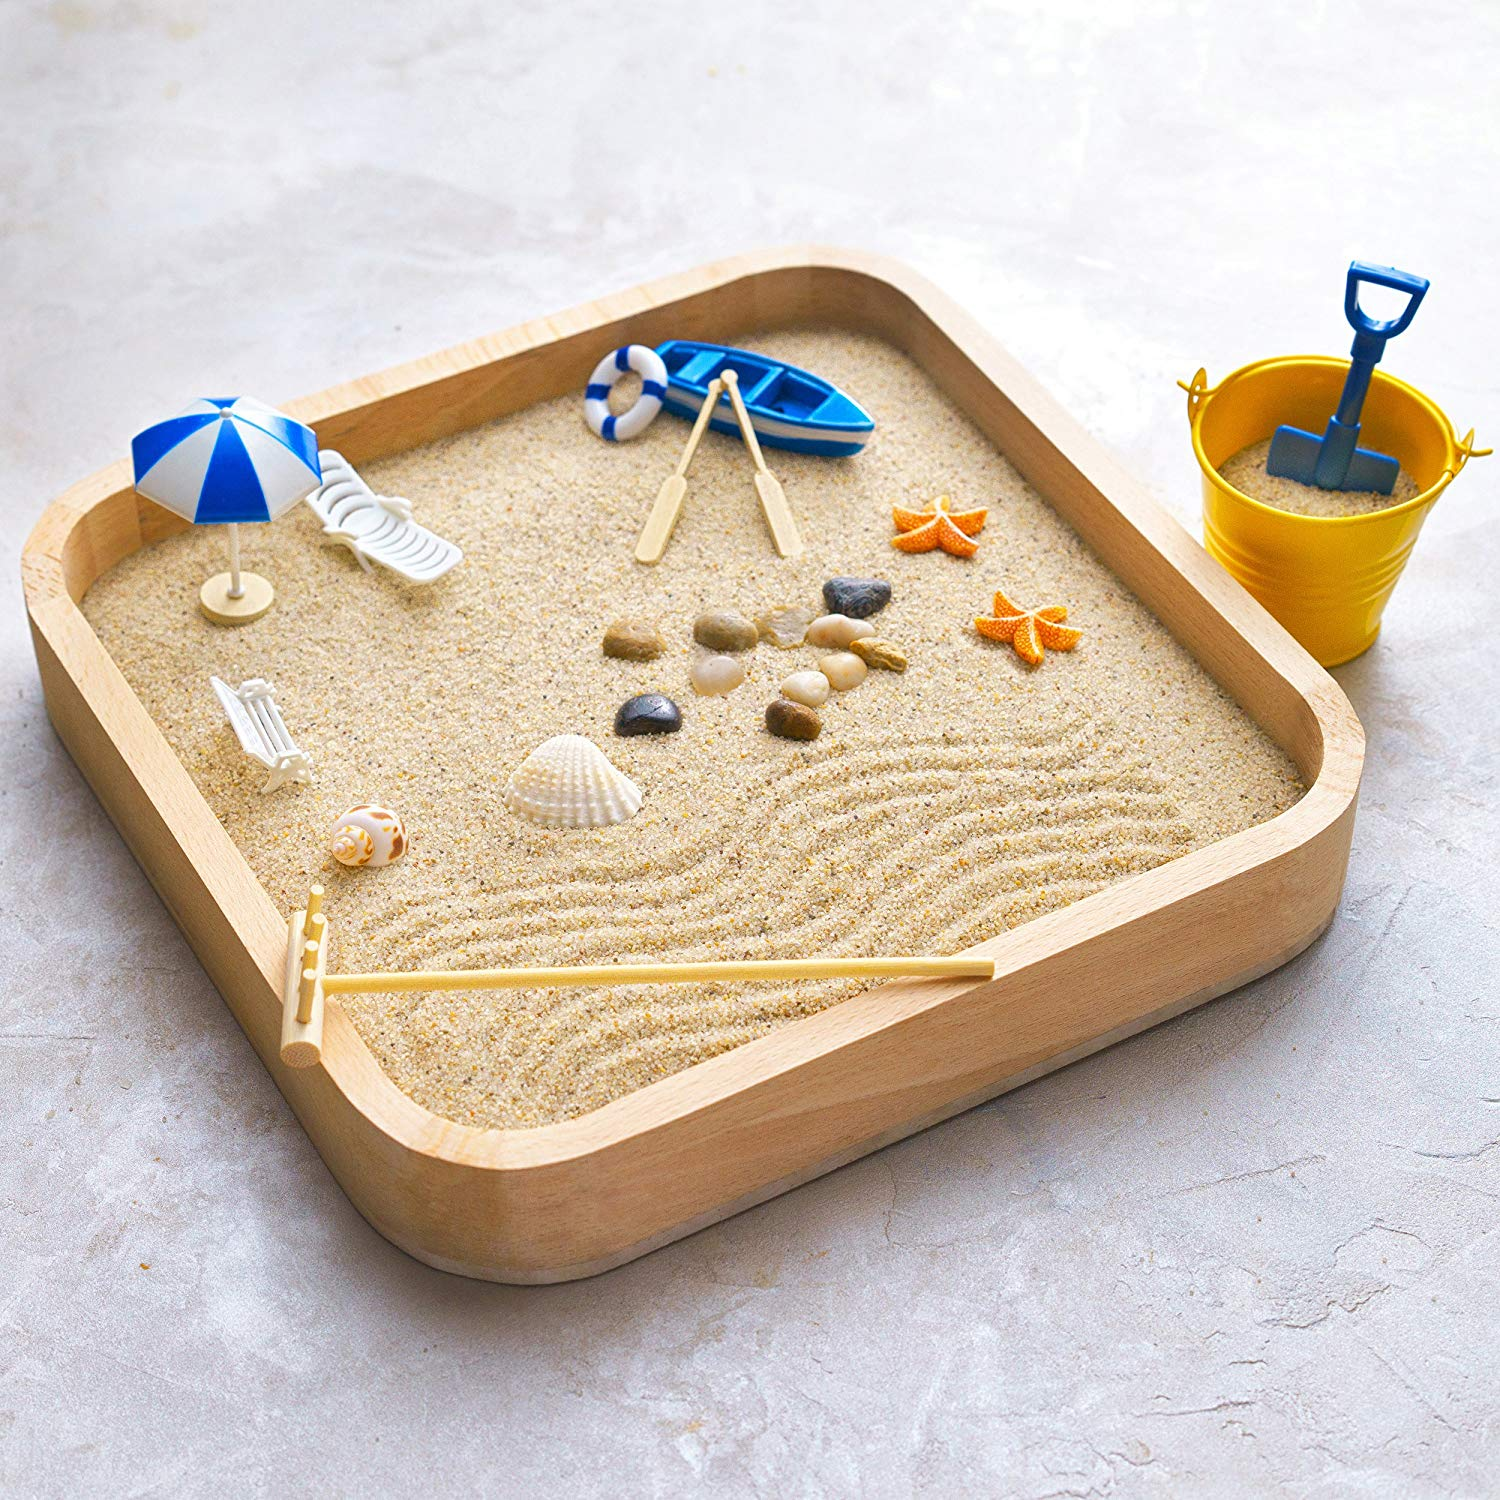
### Experimentation Sandbox


In [12]:
### STEP 1: Choose your features

# remove or add features by adding/removing a # before the name of the feature
input_features = [
       'WindSpeedMph', 
#        'SurfaceWindGustsMph',
#        'ZeroToTenLiquidSoilMoisturePercent',
#        'TenToFortyLiquidSoilMoisturePercent',
#        'FortyToOneHundredLiquidSoilMoisturePercent',
#        'SurfaceTemperatureFahrenheit', 
#        'SurfaceDewpointTemperatureFahrenheit',
#        'SurfaceWetBulbTemperatureFahrenheit', 
       'RelativeHumidityPercent',
       'brightness', 
       'bright_t31', 
       'frp' 
]


def create_train_test_data(df, input_features):
    """
    This is a helper function for you to quickly remake your train and test data.
    
    Inputs
    ----
    df: our original dataframe
    input_features: list of features you have selected above
    """
    y = np.array(df['speed_mph'])
    X = np.array(df[input_features])
    train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 137)
    return train_features, test_features, train_labels, test_labels

train_features, test_features, train_labels, test_labels = create_train_test_data(df, input_features)

### STEP 2: Adjust your models hyperparameters

# can add and remove parameters
rf = RandomForestRegressor(
    n_estimators = 100,  # choose number of trees
    max_depth = 2, # can change to None or different depth
    n_jobs= -1, 
    random_state = 137,
    verbose=0
    )


### STEP 3: Evaluate your model using cross-validation

# Set up cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=8)

# Track start time
start_time = time.time()
# Keep track of MAE for each fit
all_mae = []
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]
    
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    errors = (abs(predictions - y_test))
    mae = np.mean(errors)
    all_mae.append(mae)
    
print("--- %s seconds ---" % (time.time() - start_time))
print('Score to beat: 0.034933263379460365')
print(f'Average RF MAE over three folds: {np.mean(all_mae)}') 
print(F'Did you do better? {np.mean(all_mae) < 0.3493326}')

--- 1.3574886322021484 seconds ---
Score to beat: 0.034933263379460365
Average RF MAE over three folds: 0.034933263379460365
Did you do better? True


### Did you beat the score? If not, adjust the parameters above and run the cell above again. 
### Otherwise, let's do a final fit on all the train data and predict on the test data.

In [14]:
# fit on all training data
rf.fit(train_features, train_labels)
# predict on all test data
predictions = rf.predict(test_features)
# calculate MAE
errors = (abs(predictions - test_labels))   
print('Mean Absolute Error:', round(np.mean(errors), 7), 'mph.')
print('Mean Absolute Error:', np.mean(errors), 'mph.')

Mean Absolute Error: 0.043012 mph.
Mean Absolute Error: 0.04301203200140202 mph.


In [12]:
## score of model from challenge 7 (bad) [0.43012]
## good scores [0.0274238, 0.0275499, 0.0275499, 0.240805, 0.0245569]

## Nice work! Complete Challenge

In [ ]:
# Verification = 

# Something something  + os.path.isfile(model_name)  -  Will return True / False if the model was trained and saved. False if not.  
import urllib.request
import os
urllib.request.urlretrieve('https://raw.githubusercontent.com/watsonwarriors2020/challenges/master/ww.py','ww.py')
import ww
ww = ww.WatsonWarriors()
 
ww.answer(0, np.mean(errors))

### Enter code for completion below. 

In [ ]:
## Paste Validation Code Bleow